<a href="https://colab.research.google.com/github/argoubizakaria-web/SQL-VideoGame-Tournament-Analysis/blob/main/Projet_Devlopement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Develop = pd.read_csv('/content/sample_data/AI_Developer_Performance_Extended_1000.csv')

In [4]:
Develop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [5]:
Develop.head()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


Nettoyage des données

In [7]:
Dup = Develop.drop_duplicates()

In [9]:
print(Develop.isnull().sum())

Hours_Coding           0
Lines_of_Code          0
Bugs_Found             0
Bugs_Fixed             0
AI_Usage_Hours         0
Sleep_Hours            0
Cognitive_Load         0
Task_Success_Rate      0
Coffee_Intake          0
Stress_Level           0
Task_Duration_Hours    0
Commits                0
Errors                 0
dtype: int64


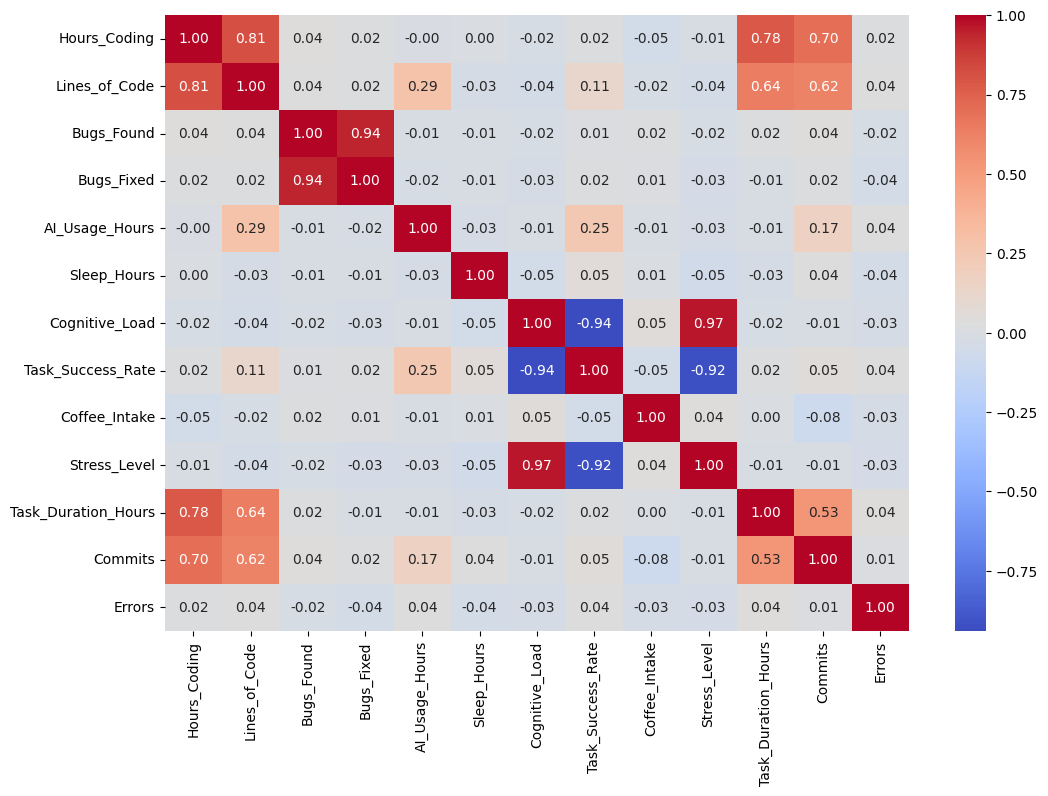

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(Develop.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

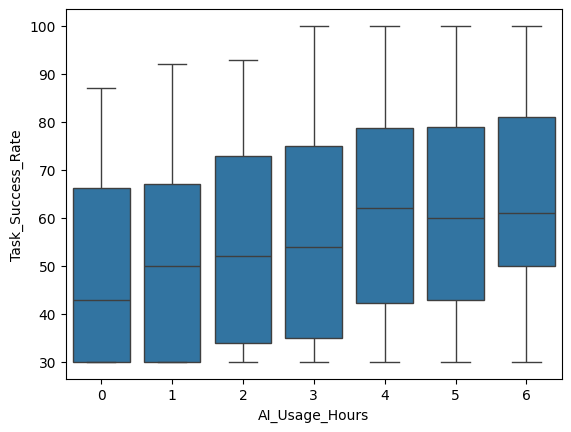

In [18]:
ax = sns.boxplot(x="AI_Usage_Hours", y="Task_Success_Rate", data=Develop)

Preparation des données

In [79]:
features = ['Stress_Level', 'AI_Usage_Hours', 'Lines_of_Code','Cognitive_Load']
X = Develop[features]
y = Develop['Task_Success_Rate']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,stratify=y , random_state=1234)

In [72]:
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [73]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state = 1234)

In [74]:
model = regression.fit(X_train, y_train)

In [75]:
model.score(X_test, y_test)

0.8968551082777267

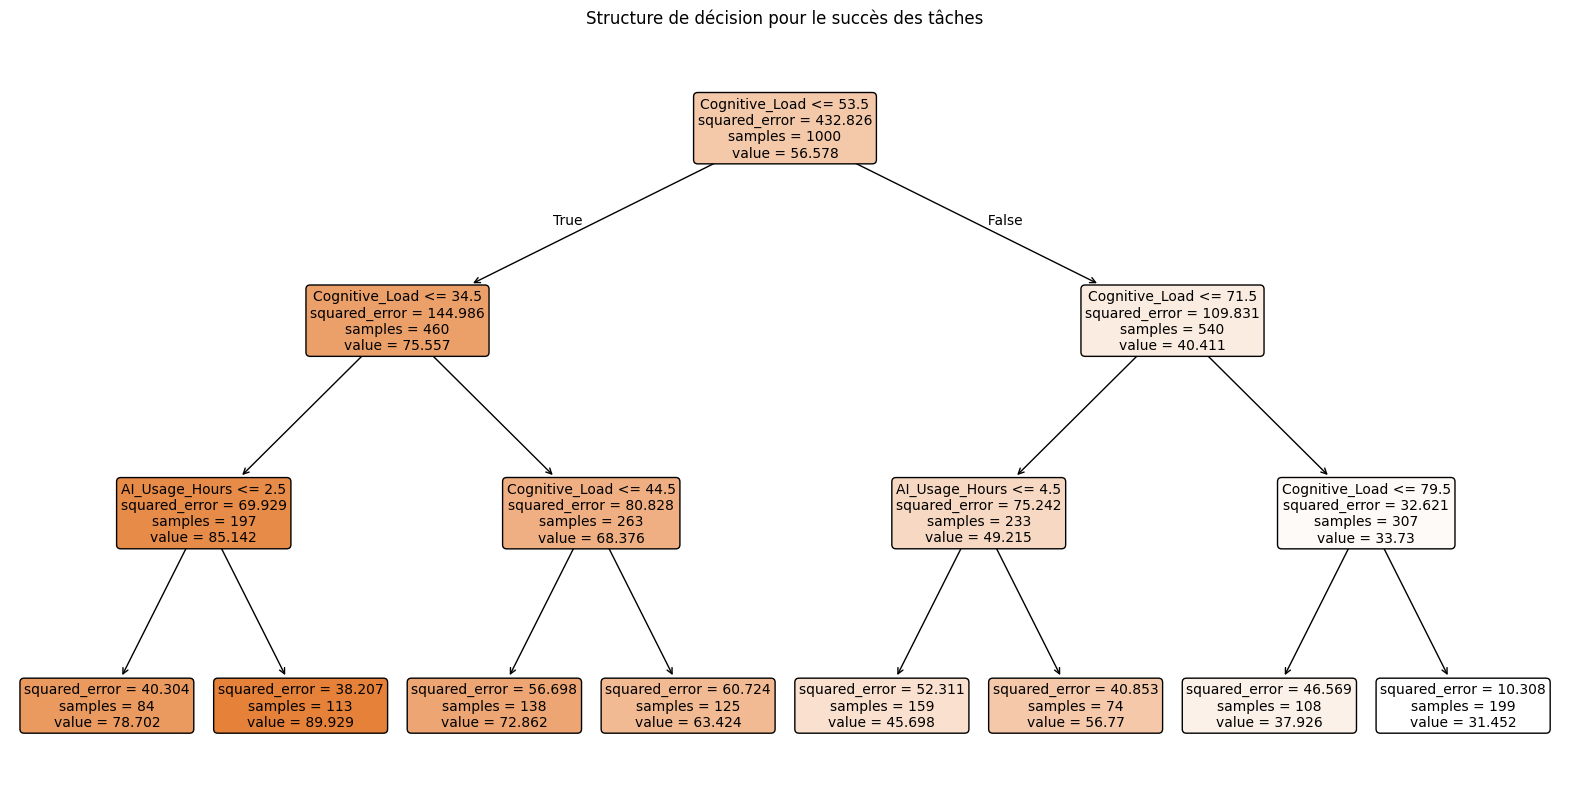

In [81]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 1. On s'assure que X et y sont bien définis avec vos données 'Develop'
X = Develop[['Cognitive_Load', 'Stress_Level', 'AI_Usage_Hours', 'Lines_of_Code']]
y = Develop['Task_Success_Rate']

# 2. On crée ET on entraîne le modèle 'regressor'
# max_depth=3 permet d'avoir un arbre lisible et évite le "sur-apprentissage"
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X, y)

# 3. Maintenant on peut visualiser
plt.figure(figsize=(20,10))
plot_tree(regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Structure de décision pour le succès des tâches")
plt.show()

In [43]:
Develop['Success_Binary'] = (Develop['Task_Success_Rate'] > 60).astype(int)

In [52]:
X = Develop[[ 'Stress_Level', 'AI_Usage_Hours', 'Lines_of_Code']]
y = Develop['Success_Binary']

In [53]:
from sklearn.preprocessing import StandardScaler


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
model = classifier.fit(X_train, y_train)

In [56]:
y_pred = model.predict(X_test)

In [57]:
model.score(X_test, y_test)

0.925

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

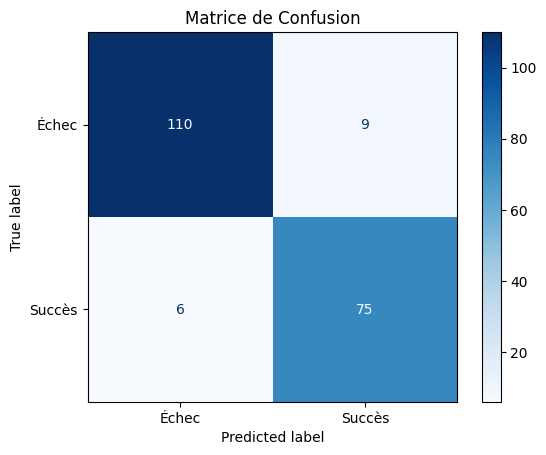

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Échec', 'Succès'])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()